In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/EDA/Batting Performance Metrics.csv')
scaled_df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/EDA/Batsman Performance Metrics (Scaled).csv')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

cumulative_variance

array([0.66438611, 0.790347  , 0.90376837, 0.95634793, 0.98153874,
       0.99709916, 0.99906495, 0.99959465, 1.        ])

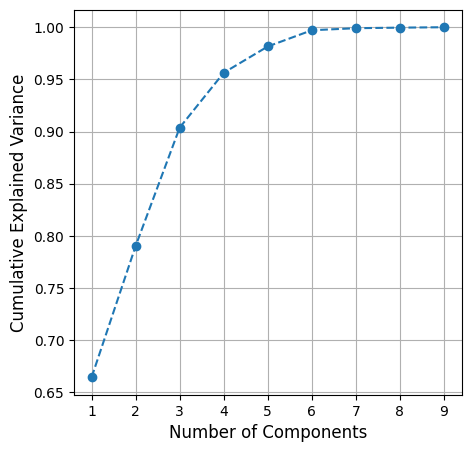

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance Explained')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
# plt.title('Cumulative Explained Variance by PCs', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

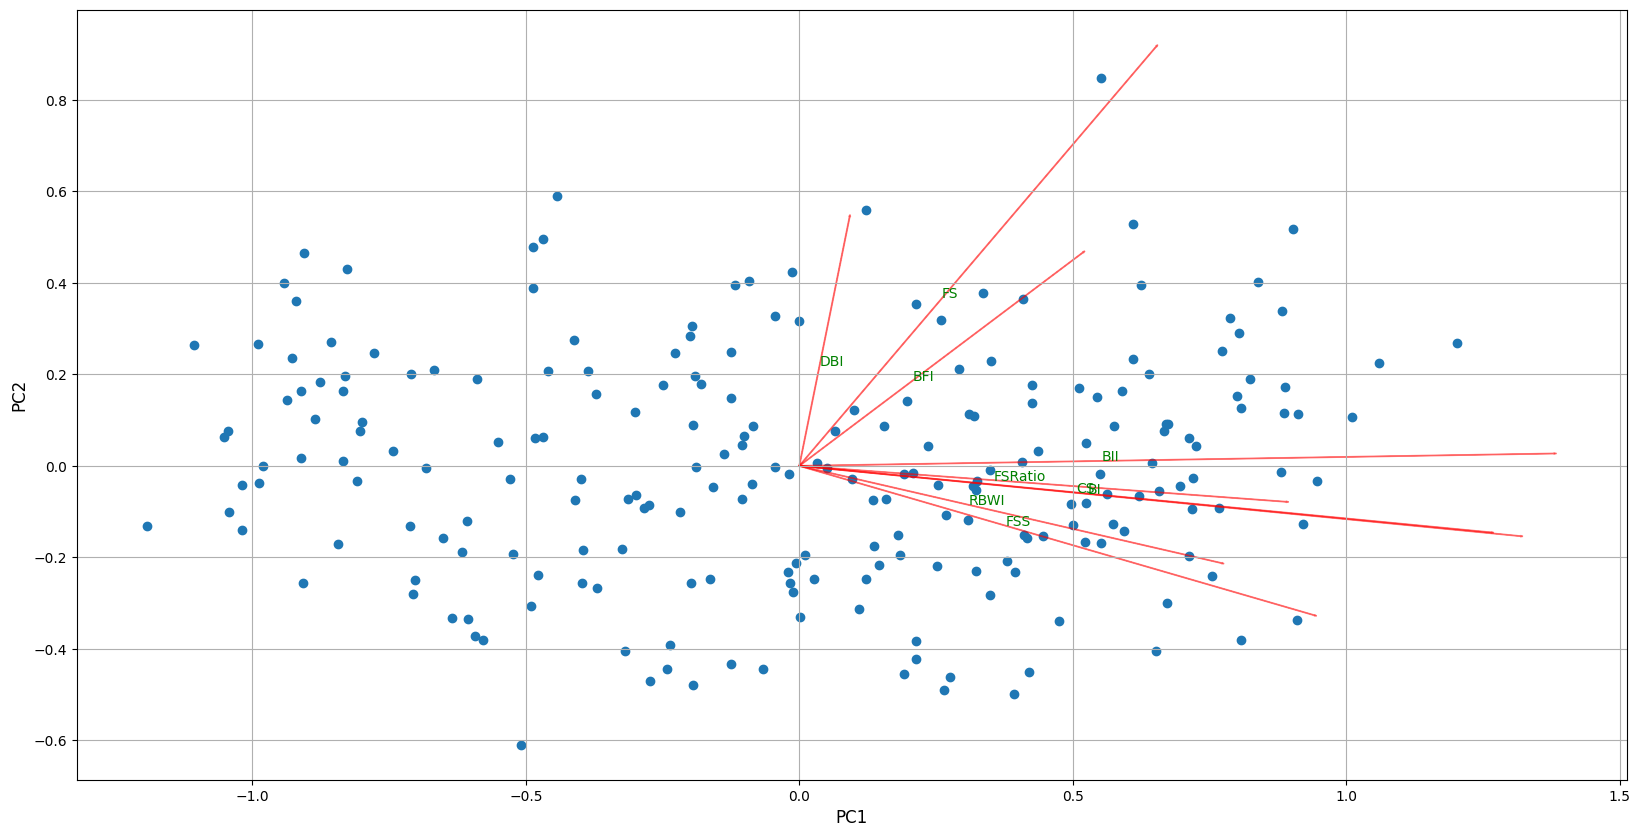

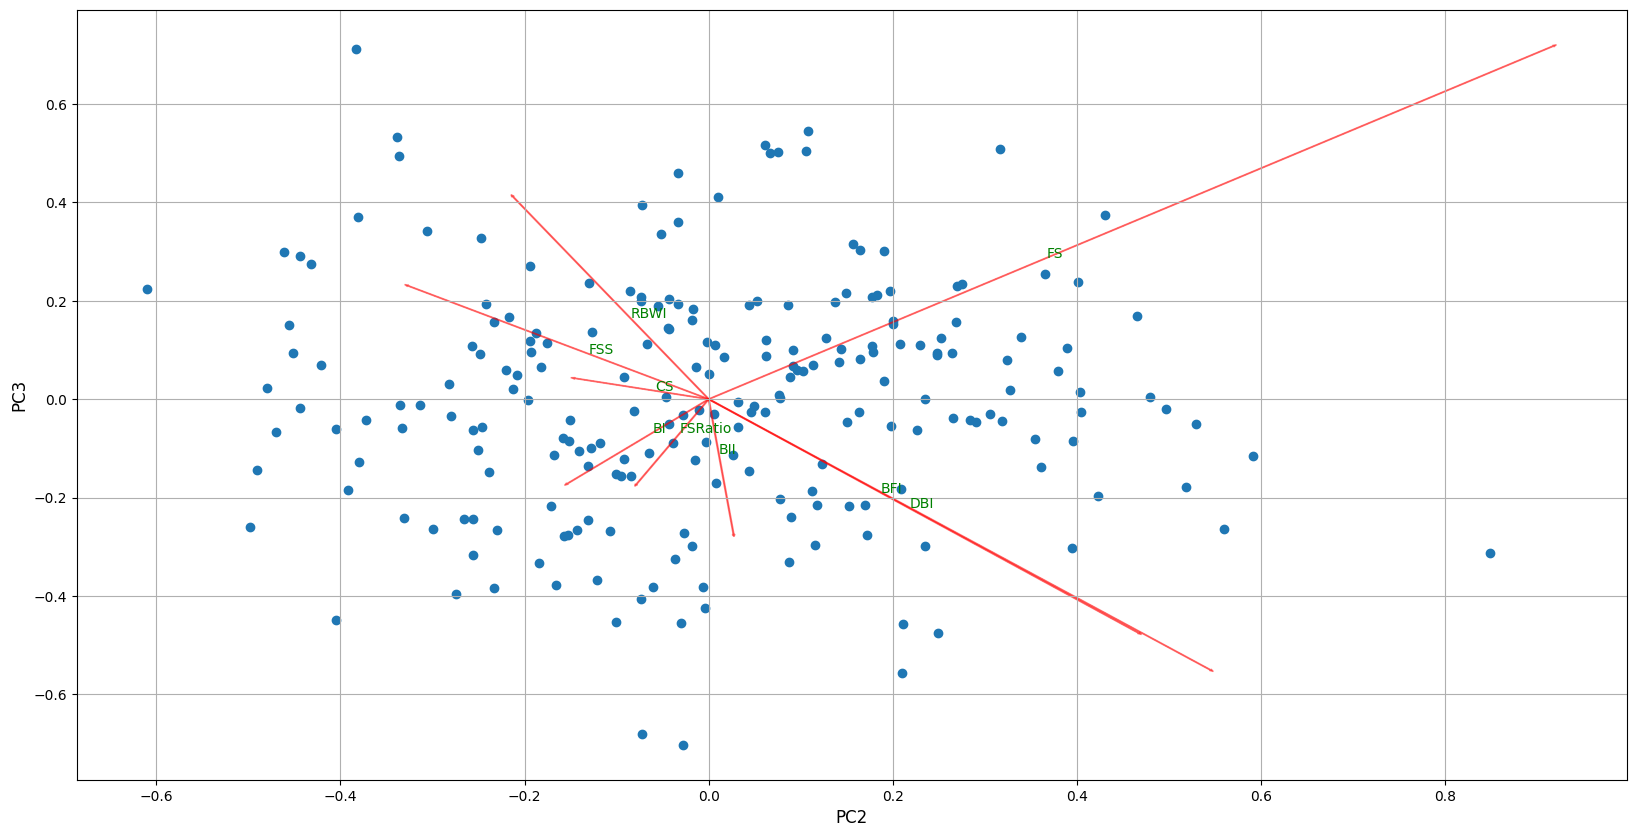

In [ ]:
import numpy as np

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


plt.figure(figsize=(20, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1])

for i, var in enumerate(scaled_df.columns):
    plt.arrow(0, 0, loadings[i, 0] * 5, loadings[i, 1] * 5, color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 2, loadings[i, 1] * 2, var, color='g')

# plt.title('PCA: PC1 vs PC2 with Loadings', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(pca_data[:, 1], pca_data[:, 2])

for i, var in enumerate(scaled_df.columns):
    plt.arrow(0, 0, loadings[i, 1] * 5, loadings[i, 2] * 5, color='r', alpha=0.5)
    plt.text(loadings[i, 1] * 2, loadings[i, 2] * 2, var, color='g')

# plt.title('PCA: PC2 vs PC3 with Loadings', fontsize=14)
plt.xlabel('PC2', fontsize=12)
plt.ylabel('PC3', fontsize=12)
plt.grid(True)
plt.show()


loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.columns)



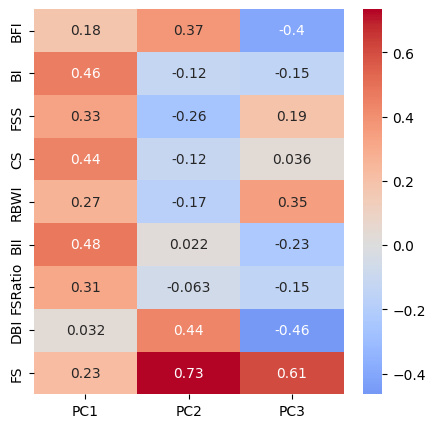

In [ ]:
import seaborn as sns

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)

plt.figure(figsize=(5,5))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
# plt.title('Loadings Heatmap', fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

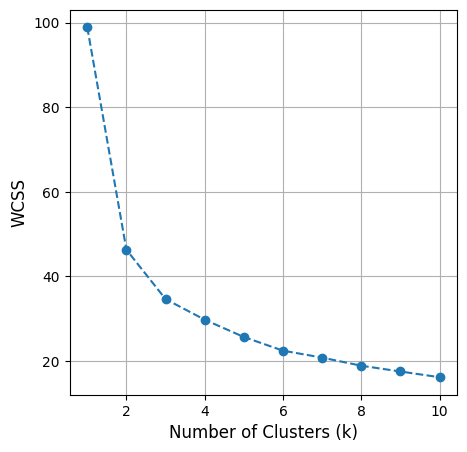

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

wcss = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(pca_data)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
# plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

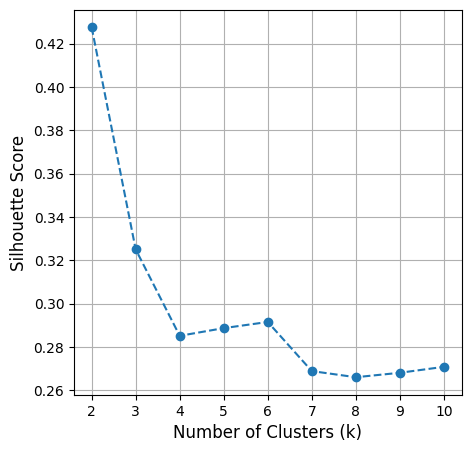

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values[1:]:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(pca_data)
  score = silhouette_score(pca_data, kmeans.labels_)
  sil_scores.append(score)

plt.figure(figsize=(5,5))
plt.plot(k_values[1:], sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
# plt.title('Silhouette Score for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = k_values[1:][np.argmax(sil_scores)]
optimal_k

2

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(pca_data)

df['KCluster'] = clusters
scaled_df['KCluster'] = clusters
pca_df['KCluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


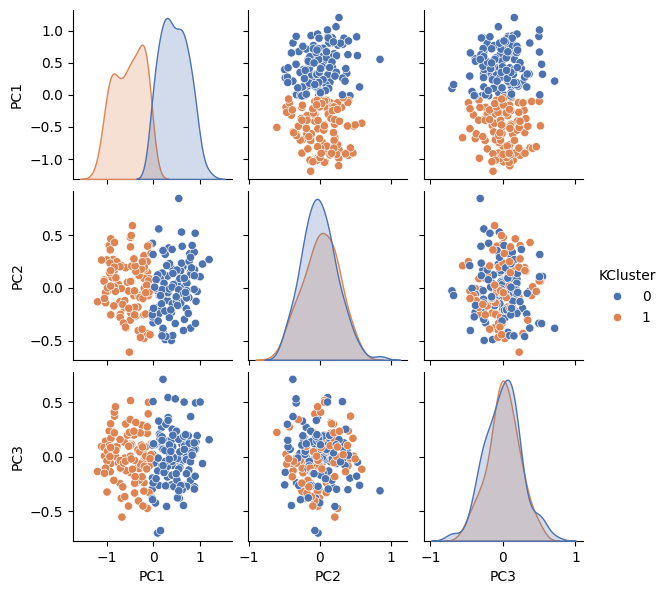

In [ ]:
sns.pairplot(pca_df, hue='KCluster', diag_kind='kde', palette='deep', height=2, aspect=1)
# plt.suptitle('KMeans Clustering for Principal Components', fontsize=14, y=1.03)
plt.show()


In [ ]:
kcluster_means_summary = scaled_df.groupby('KCluster').mean()
kcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/KMeans Summary (PCA).csv')
kcluster_means_summary

,BFI,BI,FSS,CS,RBWI,BII,FSRatio,DBI,FS
KCluster,,,,,,,,,
0,0.511704,0.734251,0.629072,0.702050,0.63436,0.700468,0.404555,0.480976,0.514042
1,0.336719,0.291316,0.306619,0.264649,0.36194,0.228121,0.098228,0.453388,0.315488


In [ ]:
kcluster_descriptive_stats = scaled_df.groupby('KCluster').describe()
kcluster_descriptive_stats.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/KMeans Descriptive Stats (PCA).csv')
kcluster_descriptive_stats

BFI                                                              \
          count      mean       std       min       25%       50%       75%   
KCluster                                                                      
0         119.0  0.511704  0.156836  0.132887  0.404864  0.522257  0.602975   
1         103.0  0.336719  0.152410  0.000000  0.229785  0.326831  0.412977   

                       BI            ...       DBI               FS            \
               max  count      mean  ...       75%       max  count      mean   
KCluster                             ...                                        
0         1.000000  119.0  0.734251  ...  0.573847  1.000000  119.0  0.514042   
1         0.797838  103.0  0.291316  ...  0.537920  0.860375  103.0  0.315488   

                                                                 
               std  min       25%       50%       75%       max  
KCluster                                                         
0         0.251337  0.0  0.368152  0.555127  0.668954  1.000000  
1         0.248890  0.0  0.000000  0.300802  0.540263  0.842816  

[2 rows x 72 columns]

In [ ]:
weights = {
    'BFI': 0.10,
    'BI': 1,
    'FSS': 1,
    'CS': 1,
    'RBWI': 0.10,
    'FSRatio': 0.5,
    'BII': 1,
    'DBI': 1,
    'FS': 1
}

cluster_0_data = scaled_df[clusters == 0].copy()


cluster_0_data['Composite Score'] = (
    cluster_0_data['BFI'] * weights['BFI'] +
    cluster_0_data['BI'] * weights['BI'] +
    cluster_0_data['BII'] * weights['BII'] +
    cluster_0_data['CS'] * weights['CS'] +
    cluster_0_data['FSS'] * weights['FSS'] +
    cluster_0_data['RBWI'] * weights['RBWI'] +
    cluster_0_data['FSRatio'] * weights['FSRatio'] +
    cluster_0_data['DBI'] * weights['DBI'] +
    cluster_0_data['FS'] * weights['FS']
)


cluster_0_data['Batsman'] = df[clusters == 0]['Player'].values
cluster_0_data['Team'] = df[clusters == 0]['Team'].values


ranked_kcluster = cluster_0_data[['Batsman', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)


ranked_kcluster


,Batsman,Team,Composite Score
188,C Dyer,Littletown CC Under 13,5.799060
88,Oliver Jackson,Castle Eden CC Under 13,5.593234
108,O Henderson,Chester Le Street CC Under 13,5.455711
137,Oliver Jackson,Durham City CC Under 13 Blue,5.338377
126,K Russell,Easington C.W. CC Under 13,5.291774
...,...,...,...
165,Gemma Potts,Sunderland CC Under 13,2.991539
150,Chloe Lucas,Seaham Harbour CC Under 13 Purple,2.940111
45,Thom Burnham,"Brandon CC, Durham Under 13",2.920571
216,Athena Whiteley,Ryhope CC Under 13,2.917159


In [ ]:
ranked_kcluster['Rank'] = range(1, len(ranked_kcluster) + 1)
ranked_kcluster = ranked_kcluster[['Rank', 'Batsman', 'Team', 'Composite Score']]
ranked_kcluster


,Rank,Batsman,Team,Composite Score
188,1,C Dyer,Littletown CC Under 13,5.799060
88,2,Oliver Jackson,Castle Eden CC Under 13,5.593234
108,3,O Henderson,Chester Le Street CC Under 13,5.455711
137,4,Oliver Jackson,Durham City CC Under 13 Blue,5.338377
126,5,K Russell,Easington C.W. CC Under 13,5.291774
...,...,...,...,...
165,115,Gemma Potts,Sunderland CC Under 13,2.991539
150,116,Chloe Lucas,Seaham Harbour CC Under 13 Purple,2.940111
45,117,Thom Burnham,"Brandon CC, Durham Under 13",2.920571
216,118,Athena Whiteley,Ryhope CC Under 13,2.917159


In [ ]:
ranked_kcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/Batsman Ranking KMeans (PCA).csv', index=False)

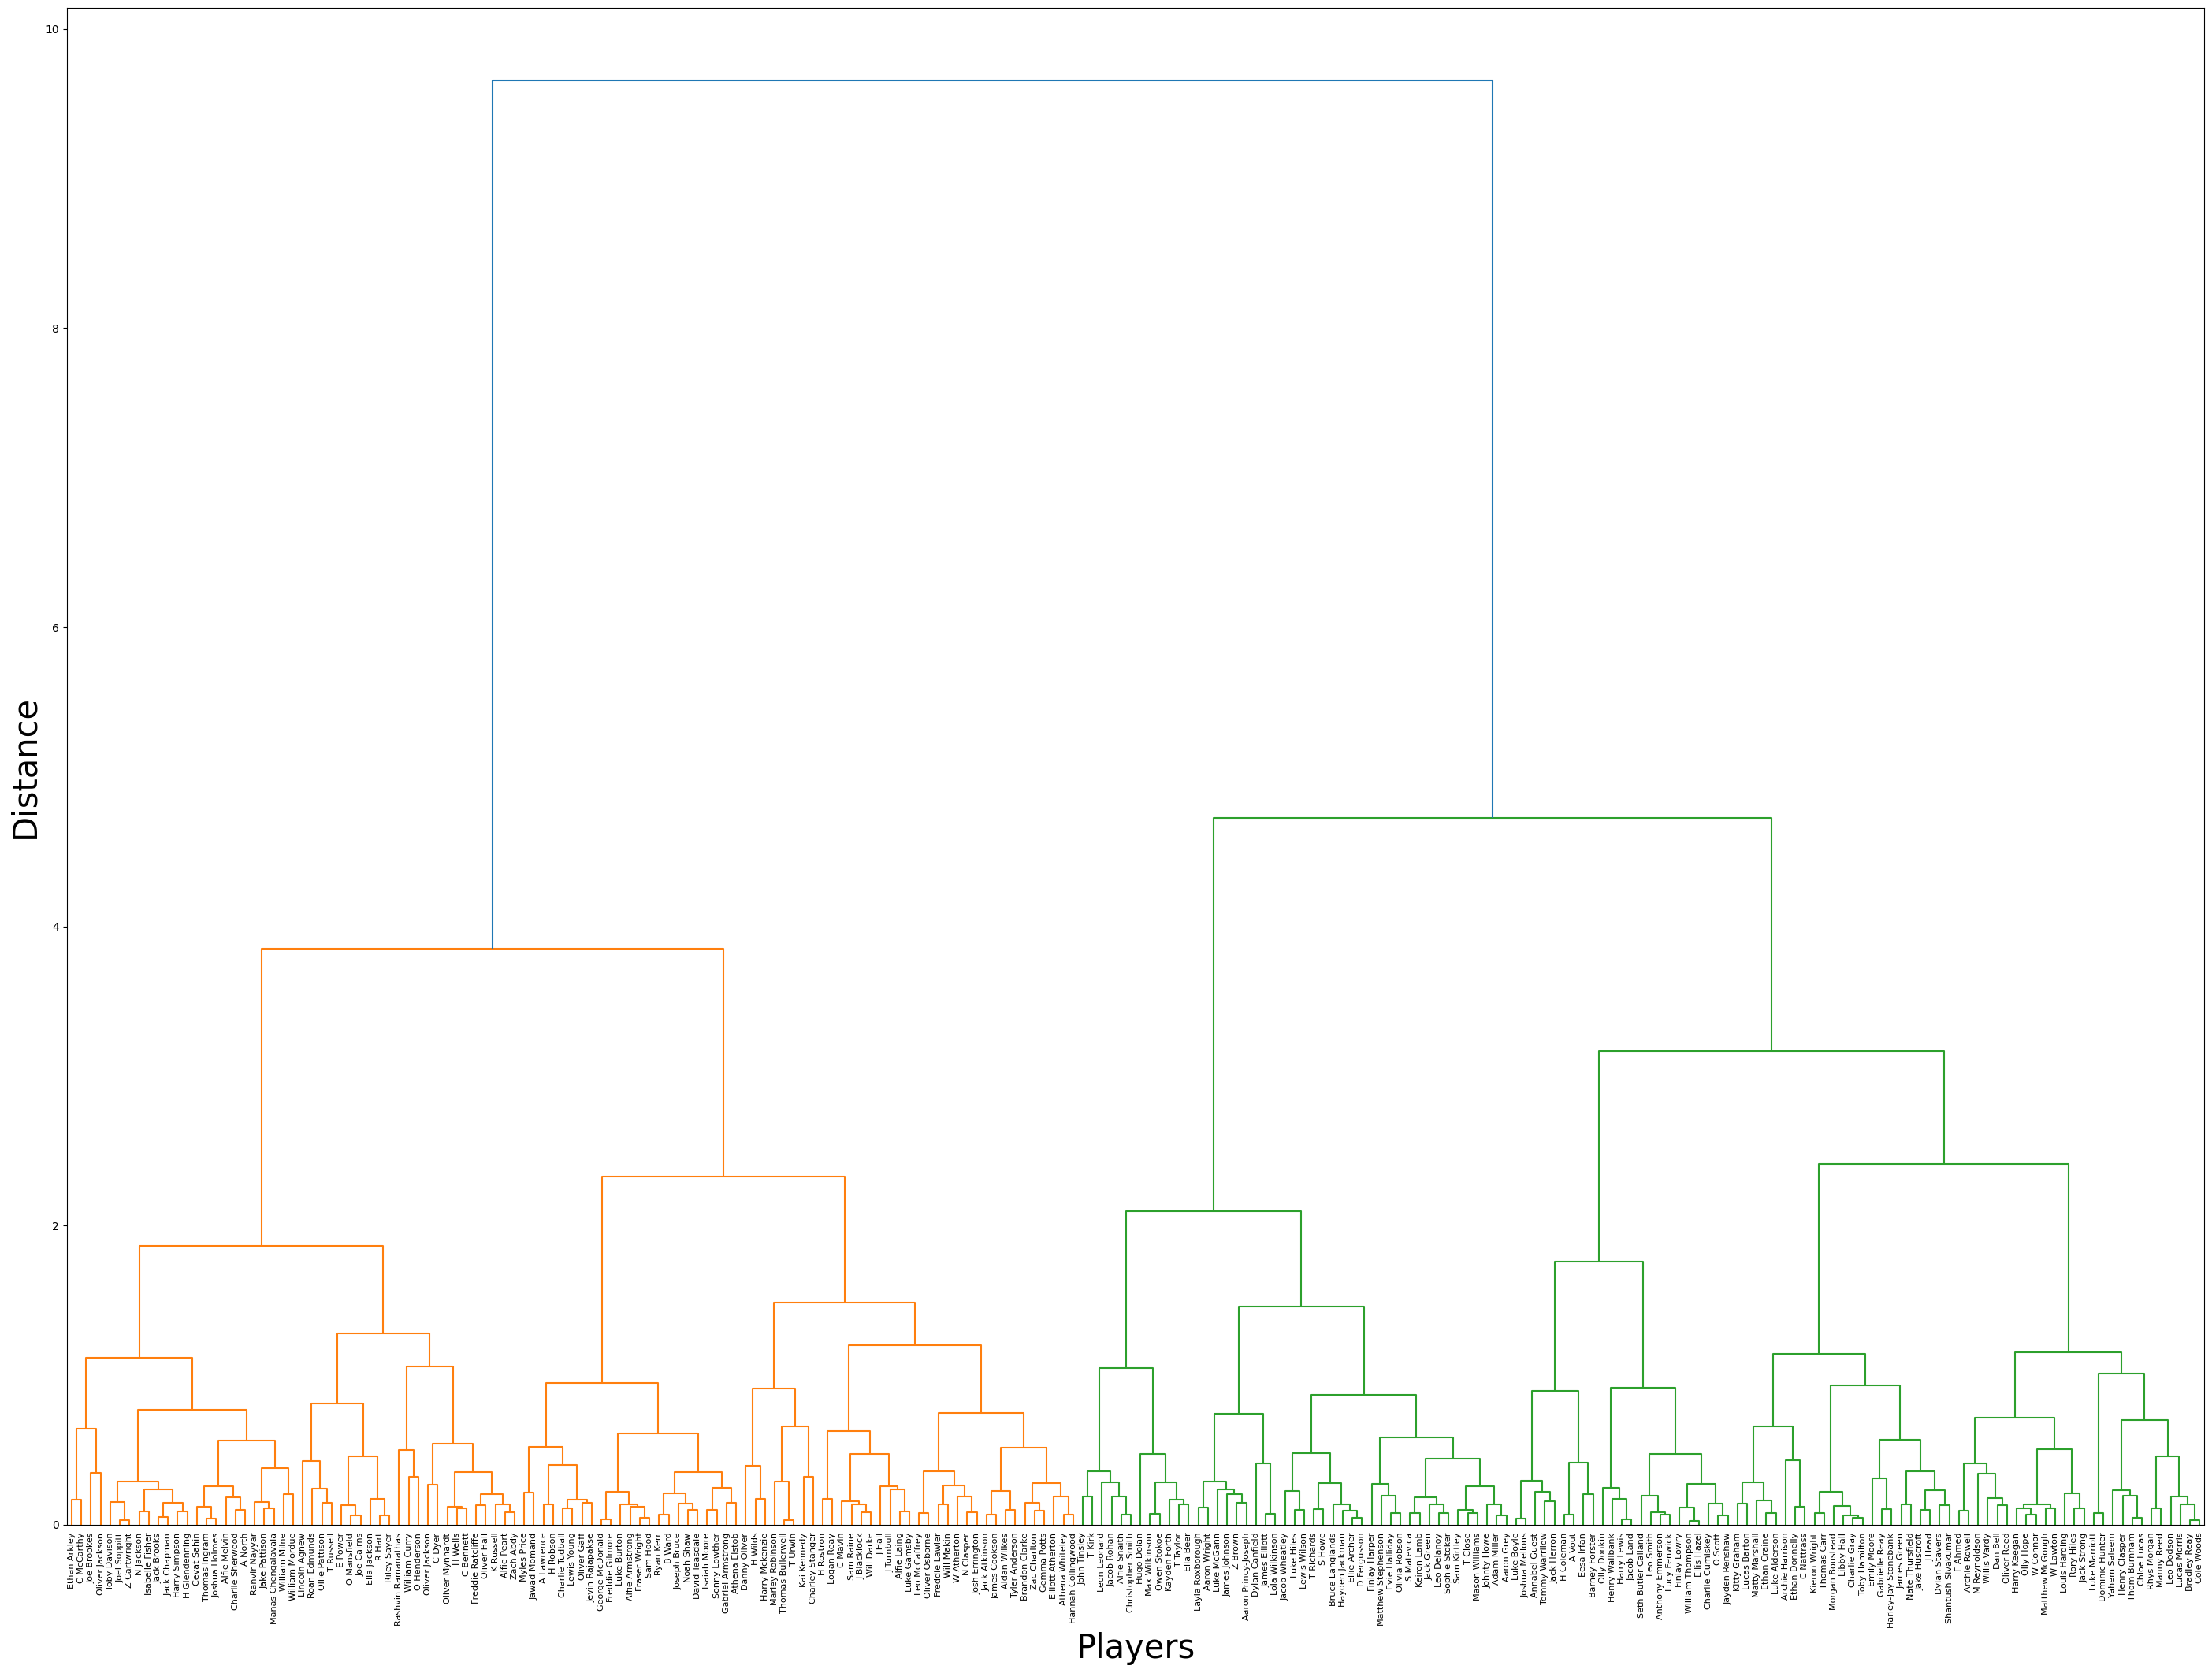

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

h_linkage = linkage(pca_df.drop('KCluster', axis=1), method='ward')

plt.figure(figsize=(35,25))
dendrogram(h_linkage, labels=df['Player'].values, leaf_rotation=90, leaf_font_size=8)
# plt.title('Hierarchical Clustering Dendrgram', fontsize=25)
plt.xlabel('Players', fontsize=30)
plt.ylabel('Distance', fontsize=30)
plt.show()

In [ ]:
h_labels = fcluster(h_linkage, t=6, criterion='distance')

df['Hcluster'] = h_labels
scaled_df['Hcluster'] = h_labels
pca_df['Hcluster'] = h_labels


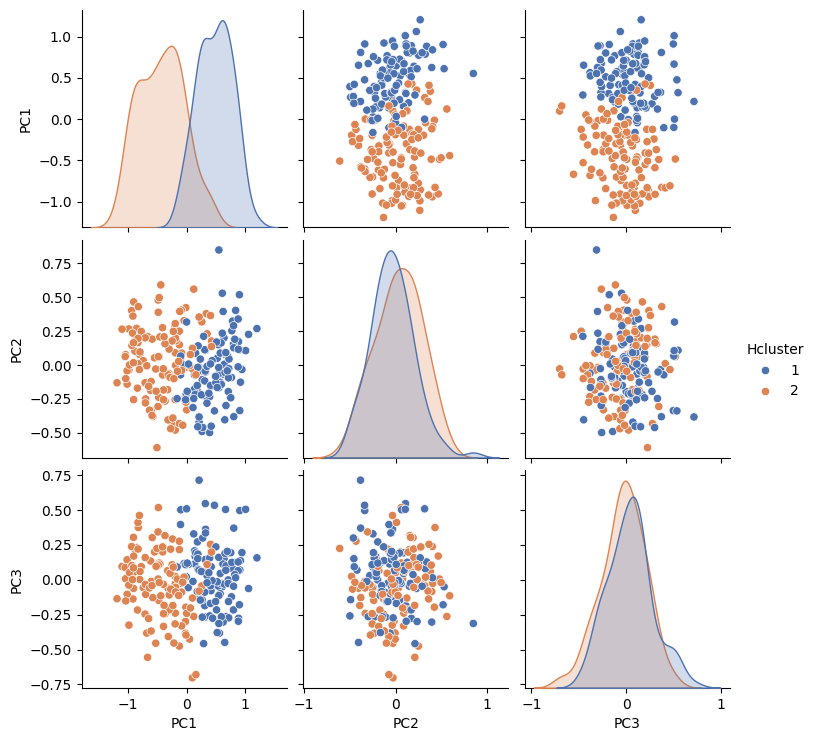

In [ ]:
sns.pairplot(pca_df.drop('KCluster', axis=1), hue='Hcluster', palette='deep', diag_kind='kde')
# plt.suptitle('Pairplot of Encoded Dimensions', y=1.02, fontsize=16)
plt.show()


In [ ]:
hcluster_means_summary = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').mean()
hcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/Hierarchical Summary (PCA).csv')
hcluster_means_summary

,BFI,BI,FSS,CS,RBWI,BII,FSRatio,DBI,FS
Hcluster,,,,,,,,,
1,0.486698,0.747409,0.654109,0.718105,0.650469,0.703854,0.414230,0.450383,0.529634
2,0.380099,0.332508,0.322734,0.302579,0.380081,0.281602,0.126199,0.484144,0.325253


In [ ]:
h_cluster_descriptive = scaled_df.drop('KCluster', axis=1).groupby('Hcluster').describe()
h_cluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/Hierarchical Descriptive Stats (PCA).csv')
h_cluster_descriptive

BFI                                                              \
          count      mean       std       min       25%       50%       75%   
Hcluster                                                                      
1         105.0  0.486698  0.164011  0.132887  0.362957  0.504059  0.594321   
2         117.0  0.380099  0.174594  0.000000  0.269230  0.361986  0.516863   

                       BI            ...       DBI              FS            \
               max  count      mean  ...       75%      max  count      mean   
Hcluster                             ...                                       
1         1.000000  105.0  0.747409  ...  0.548024  1.00000  105.0  0.529634   
2         0.836327  117.0  0.332508  ...  0.576982  0.87461  117.0  0.325253   

                                                                 
               std  min       25%       50%       75%       max  
Hcluster                                                         
1         0.230189  0.0  0.368152  0.555127  0.668954  1.000000  
2         0.264689  0.0  0.000000  0.300802  0.555127  0.923279  

[2 rows x 72 columns]

In [ ]:
h_cluster_1_data = scaled_df.drop('KCluster', axis=1)[h_labels == 1].copy()

h_cluster_1_data['Composite Score'] = (
    h_cluster_1_data['BFI'] * weights['BFI'] +
    h_cluster_1_data['BI'] * weights['BI'] +
    h_cluster_1_data['BII'] * weights['BII'] +
    h_cluster_1_data['CS'] * weights['CS'] +
    h_cluster_1_data['FSS'] * weights['FSS'] +
    h_cluster_1_data['RBWI'] * weights['RBWI'] +
    h_cluster_1_data['FSRatio'] * weights['FSRatio'] +
    h_cluster_1_data['DBI'] * weights['DBI'] +
    h_cluster_1_data['FS'] * weights['FS']
)


h_cluster_1_data['Batsman'] = df[h_labels==1]['Player'].values
h_cluster_1_data['Team'] = df[h_labels == 1]['Team'].values


ranked_hcluster = h_cluster_1_data[['Batsman', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)


ranked_hcluster

,Batsman,Team,Composite Score
188,C Dyer,Littletown CC Under 13,5.799060
88,Oliver Jackson,Castle Eden CC Under 13,5.593234
108,O Henderson,Chester Le Street CC Under 13,5.455711
137,Oliver Jackson,Durham City CC Under 13 Blue,5.338377
126,K Russell,Easington C.W. CC Under 13,5.291774
...,...,...,...
19,Leo McCaffrey,"Marsden CC, Tyne & Wear Under 13",2.983847
135,Harry Mckenzie,Seaham Park CC Under 13,2.965501
216,Athena Whiteley,Ryhope CC Under 13,2.917159
110,H Wilds,Durham City CC Under 13 Blue,2.721211


In [ ]:
ranked_hcluster['Rank'] = range(1, len(ranked_hcluster) + 1)
ranked_hcluster = ranked_hcluster[['Rank', 'Batsman', 'Team', 'Composite Score']]
ranked_hcluster

,Rank,Batsman,Team,Composite Score
188,1,C Dyer,Littletown CC Under 13,5.799060
88,2,Oliver Jackson,Castle Eden CC Under 13,5.593234
108,3,O Henderson,Chester Le Street CC Under 13,5.455711
137,4,Oliver Jackson,Durham City CC Under 13 Blue,5.338377
126,5,K Russell,Easington C.W. CC Under 13,5.291774
...,...,...,...,...
19,101,Leo McCaffrey,"Marsden CC, Tyne & Wear Under 13",2.983847
135,102,Harry Mckenzie,Seaham Park CC Under 13,2.965501
216,103,Athena Whiteley,Ryhope CC Under 13,2.917159
110,104,H Wilds,Durham City CC Under 13 Blue,2.721211


In [ ]:
ranked_hcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/Batsman Ranking Hierarchical (PCA).csv', index=False)

In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/Scaled Data with clusters.csv', index=False)
pca_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/PCA Data with clusters.csv', index=False)
df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Batting Analysis (Ball By Ball)/Analysis (PCA)/Data with clusters.csv', index=False)